**Chapter 2.2: Exercise 2.2 Question 4**

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x_1,x_2)= x_1^2 + 2x_1x_2 + 2 x_2^2\\]

In [80]:
#Calculate the Gradient
import sympy as sp
x = sp.IndexedBase('x')
f = 1.0 * x[0] * x[0] + 2.0 * x[0] * x[1] + 2.0 * x[1] * x[1]
x = sp.Matrix([x[0], x[1]])
gradient = sp.Matrix([sp.diff(f, var) for var in x])

The gradient is \\[ \nabla f(x) = \left(\begin{array}{c}2 x_1 + 2 x_2  \\ 2 x_1 + 4 x_2 \end{array}\right)\\]

In [81]:
#Calculate the Hessian
hessian = sp.Matrix(2, 2, lambda i, j: sp.diff(f, x[i], x[j]))
hessian

Matrix([
[2.0, 2.0],
[2.0, 4.0]])

In [82]:
import numpy as np
def ex0224(x):
    f = 1.0 * x[0] * x[0] + 2.0 * x[0] * x[1] + 2.0 * x[1] * x[1]
    g = np.array([2.0 * x[0] + 2.0 * x[1], 2.0 * x[0] + 4.0 * x[1]])
    h = np.array([[2.0, 2.0],[2.0, 4.0]])
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right)\\]

In [83]:
x = np.array([1, 1])
f, g, h = ex0224(x)

In [84]:
print(f)

5.0


In [85]:
print(g)

[4. 6.]


In order to plot the function, it don't need the gradient. Therefore, it wraps the above function in another function "fct" that returns only the value of the function.

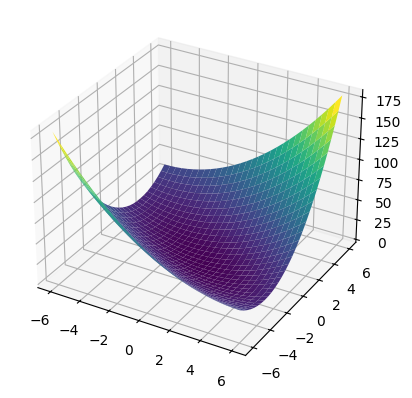

In [86]:
def fct(x, y):
    f, g, h = ex0224(np.array([x, y]))
    return f

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

**It is necessary to check the eigenvalues of the Hessian matrix: since all eigenvalues are positive, the function is convex.**

It investigates the shape of the function along several directions. It defines three directions.

In [87]:
d1 = -g
d2 = np.array([1, 0])
d3 = np.array([1, -3])

It plots the function along the three directions

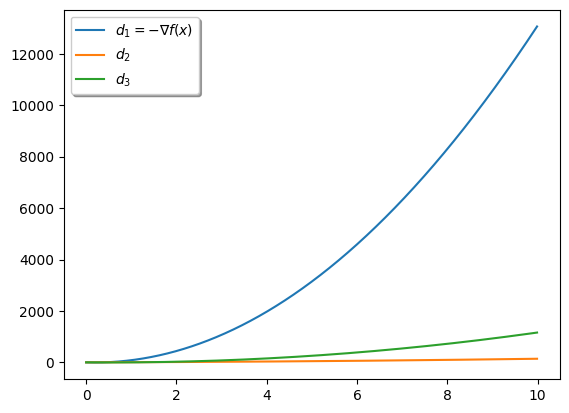

In [88]:
plotalpha = np.arange(0, 10, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex0224(x + alpha * d1)[0] for alpha in plotalpha])
fx2 = np.array([ex0224(x + alpha * d2)[0] for alpha in plotalpha])
fx3 = np.array([ex0224(x + alpha * d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha,
                               fx1,
                               plotalpha,
                               fx2,
                               plotalpha,
                               fx3)
ax.legend((plot1,plot2,plot3),
          ('$d_1=-\\nabla f(x)$', '$d_2$', '$d_3$'), \
              loc='upper left', shadow=True)

The curvature of the function in different directions is given below

In [89]:
def ex0224(x):
    f = 1.0 * x[0] * x[0] + 2.0 * x[0] * x[1] + 2.0 * x[1] * x[1]
    g = np.array([2.0 * x[0] + 2.0 * x[1], 2.0 * x[0] + 4.0 * x[1]])
    h = np.array([[2.0, 2.0],[2.0, 4.0]])
    return f, g, h

x = np.array([1, 1])
f, g, h = ex0224(x)

In [90]:
d = np.array([1, 0])
(d @ h @ d) / (d @ d)

np.float64(2.0)

Hessiana H:
[[2 2]
 [2 4]]

Autovalores (Lambda):
[0.76393202 5.23606798]

Autovetores (Q):
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]

Matriz de transformação T:
[[-0.97324899  0.60150096]
 [ 0.22975292  0.37174803]]


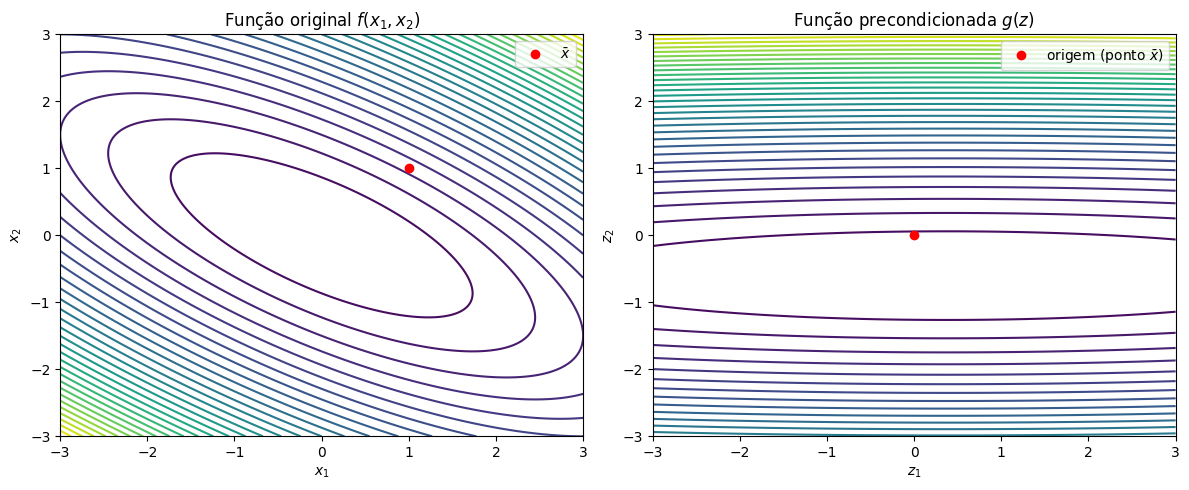

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Função original
def f(x1, x2):
    return x1**2 + 2*x1*x2 + 2*x2**2

# Ponto de referência
x_bar = np.array([1, 1])

# Hessiana da função
H = np.array([[2, 2],
              [2, 4]])

print("Hessiana H:")
print(H)

# Decomposição espectral (autovalores e autovetores)
eigenvalues, Q = np.linalg.eigh(H)
Lambda = np.diag(eigenvalues)

print("\nAutovalores (Lambda):")
print(eigenvalues)
print("\nAutovetores (Q):")
print(Q)

# Matriz de transformação T = Lambda^(-1/2) * Q^T
Lambda_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues))
T = Lambda_inv_sqrt @ Q.T

print("\nMatriz de transformação T:")
print(T)

# Função precondicionada g(z) = f(T⁻¹z + x̄)
def g(z):
    x = np.linalg.inv(T) @ z + x_bar
    return f(x[0], x[1])

# Plotando os contornos da função original e transformada
X1, X2 = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
Z = f(X1, X2)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Contorno da função original
ax[0].contour(X1, X2, Z, levels=30)
ax[0].set_title("Função original $f(x_1, x_2)$")
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")
ax[0].plot(1, 1, 'ro', label="$\\bar{x}$")
ax[0].legend()

# Gerando pontos no novo espaço z
Z1, Z2 = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
G = np.zeros_like(Z1)
for i in range(Z1.shape[0]):
    for j in range(Z1.shape[1]):
        G[i, j] = g(np.array([Z1[i, j], Z2[i, j]]))

# Contorno da função precondicionada
ax[1].contour(Z1, Z2, G, levels=30)
ax[1].set_title("Função precondicionada $g(z)$")
ax[1].set_xlabel("$z_1$")
ax[1].set_ylabel("$z_2$")
ax[1].plot(0, 0, 'ro', label="origem (ponto $\\bar{x}$)")
ax[1].legend()

plt.tight_layout()
plt.show()

**Chapter 2.2: Exercise 2.2 Question 5**

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= x_1^2 - x_1x_2 + 2x_2^2 - 2x_1 + e^{x_1 + x_2}\\]

In [92]:
#Calculate the gradient
import sympy as sp
x = sp.IndexedBase('x')
f = 1.0 * x[0] * x[0] - 1.0 * x[0] * x[1] + 2.0 * x[1] * x[1] - 2.0 * x[0] + 1.0 * sp.exp(x[0] + x[1])
x = sp.Matrix([x[0], x[1]])
gradiente = sp.Matrix([sp.diff(f, var) for var in x])

The gradient is \\[ \nabla f(x) = \left(\begin{array}{c}2 x_1 - x_2 - 2 + e^{(x_1 + x_2)}  \\ - x_1 + 4 x_2 + e^{(x_1 + x_2)} \end{array}\right)\\]

In [93]:
#Calculate the Hessian
hessian = sp.Matrix(2, 2, lambda i, j: sp.diff(f, x[i], x[j]))

The Hessian is \\[ H = \left(\begin{array}{cc}2 + e^{(x_1 + x_2)} & - 1 + e^{(x_1 + x_2)}  \\ - 1 + e^{(x_1 + x_2)} & 4 + e^{(x_1 + x_2)} \end{array}\right)\\]

In [94]:
import numpy as np
def ex0225(x):
    f = 1.0*x[0]*x[0] - 1.0*x[0]*x[1] + 2.0*x[1]*x[1] - 2.0*x[0] + 1.0*sp.exp(x[0] + x[1])
    g = np.array([2.0*x[0] - x[1] - 2.0 + 1.0*sp.exp(x[0] + x[1]), -1.0*x[0] + 4.0*x[1] + 1.0*sp.exp(x[0] + x[1])])
    h = np.array([[2.0 + 1.0*sp.exp(x[0] + x[1]), -1.0 + 1.0*sp.exp(x[0] + x[1])] , [-1.0 + 1.0*sp.exp(x[0] + x[1]), 1.0*sp.exp(x[0] + x[1])]])
    return f, g, h   

Evaluate the function at \\[ x = \left(\begin{array}{c}0 \\ 0 \end{array}\right)\\]

In [110]:
x = np.array([0, 0])
f, g, h = ex0225(x)

In [111]:
print (f)

1.00000000000000


In [112]:
print (g)

[-1.00000000000000 1.00000000000000]


In order to plot the function, it don't need the gradient. Therefore, it wraps the above function in another function "fct" that returns only the value of the function.

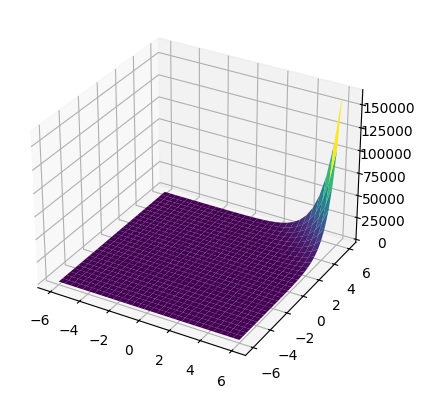

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fct(x, y):
    f, g, h = ex0225(np.array([x, y]))
    return f

# Create meshgrid
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
#Z = fct(X, Y)
Z = np.vectorize(fct)(X, Y)


# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

plt.show()


In [114]:
d1 = -g
d2 = np.array([1, 0])
d3 = np.array([1, -3])

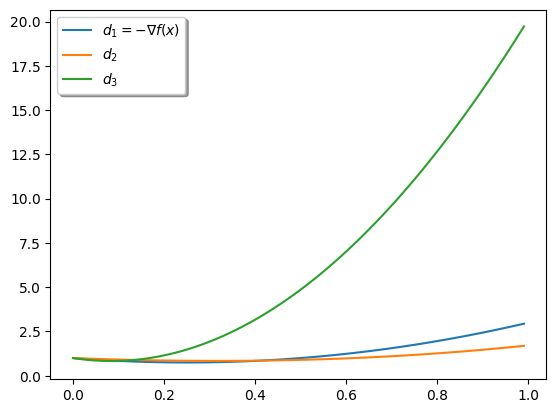

In [115]:
plotalpha = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex0225(x + alpha * d1)[0] for alpha in plotalpha])
fx2 = np.array([ex0225(x + alpha * d2)[0] for alpha in plotalpha])
fx3 = np.array([ex0225(x + alpha * d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha,
                               fx1,
                               plotalpha,
                               fx2,
                               plotalpha,
                               fx3)
ax.legend((plot1,plot2,plot3),
          ('$d_1=-\\nabla f(x)$', '$d_2$', '$d_3$'), \
              loc='upper left', shadow=True)

In [101]:
def ex0224(x):
    f = 1.0*x[0]*x[0] - 1.0*x[0]*x[1] + 2.0*x[1]*x[1] - 2.0*x[0] + 1.0*sp.exp(x[0] + x[1])
    g = np.array([2.0*x[0] - x[1] - 2.0 + 1.0*sp.exp(x[0] + x[1]), -1.0*x[0] + 4.0*x[1] + 1.0*sp.exp(x[0] + x[1])])
    h = np.array([[2.0 + 1.0*sp.exp(x[0] + x[1]), -1.0 + 1.0*sp.exp(x[0] + x[1])] , [-1.0 + 1.0*sp.exp(x[0] + x[1]), 1.0*sp.exp(x[0] + x[1])]])
    return f, g, h

x = np.array([1, 1])
f, g, h = ex0225(x)

In [102]:
d = np.array([1, 0])
(d @ h @ d) / (d @ d)

2.0 + 1.0*exp(2)

Hessiana H:
[[3. 0.]
 [0. 5.]]

Autovalores (Lambda):
[3. 5.]

Autovetores (Q):
[[1. 0.]
 [0. 1.]]

Matriz de transformação T:
[[0.57735027 0.        ]
 [0.         0.4472136 ]]


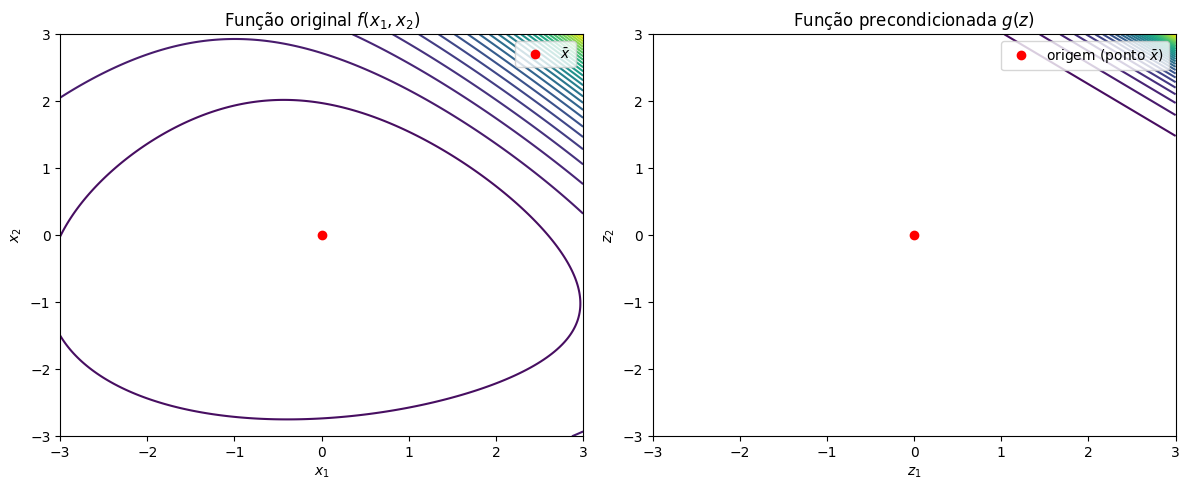

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Função original
def f(x1, x2):
    return x1**2 - x1*x2 + 2*x2**2 - 2*x1 + sp.exp(x1 + x2)

# Ponto de referência
x_bar = np.array([0, 0])

# Hessiana da função
H = np.array([[2.0 + float(sp.exp(x_bar[0] + x_bar[1])), -1.0 + float(sp.exp(x_bar[0] + x_bar[1]))], 
              [-1.0 + float(sp.exp(x_bar[0] + x_bar[1])), 4.0 + float(sp.exp(x_bar[0] + x_bar[1]))]], dtype=float)

print("Hessiana H:")
print(H)

# Decomposição espectral (autovalores e autovetores)
eigenvalues, Q = np.linalg.eigh(H)
Lambda = np.diag(eigenvalues)

print("\nAutovalores (Lambda):")
print(eigenvalues)
print("\nAutovetores (Q):")
print(Q)

# Matriz de transformação T = Lambda^(-1/2) * Q^T
Lambda_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues))
T = Lambda_inv_sqrt @ Q.T

print("\nMatriz de transformação T:")
print(T)

# Função precondicionada g(z) = f(T⁻¹z + x̄)
def g(z):
    x = np.linalg.inv(T) @ z + x_bar
    return f(x[0], x[1])

# Plotando os contornos da função original e transformada
X1, X2 = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
Z = np.vectorize(f)(X1, X2).astype(float)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Contorno da função original
ax[0].contour(X1, X2, Z, levels=30)
ax[0].set_title("Função original $f(x_1, x_2)$")
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")
ax[0].plot(0, 0, 'ro', label="$\\bar{x}$")
ax[0].legend()

# Gerando pontos no novo espaço z
Z1, Z2 = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
G = np.zeros_like(Z1)
for i in range(Z1.shape[0]):
    for j in range(Z1.shape[1]):
        G[i, j] = g(np.array([Z1[i, j], Z2[i, j]]))

# Contorno da função precondicionada
ax[1].contour(Z1, Z2, G, levels=30)
ax[1].set_title("Função precondicionada $g(z)$")
ax[1].set_xlabel("$z_1$")
ax[1].set_ylabel("$z_2$")
ax[1].plot(0, 0, 'ro', label="origem (ponto $\\bar{x}$)")
ax[1].legend()

plt.tight_layout()
plt.show()